MLP con Early Stopping y Dropout (Core)

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el “Heart Disease UCI” de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

1) Carga de datos:

Descarga el dataset "Heart Disease UCI" de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.

Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

Dataset: https://www.kaggle.com/datasets/ronitf/heart-disease-uci

1.a) Carga de datos

In [1]:
import pandas as pd

# Especificar la ruta del archivo CSV
file_path = "/content/heart_disease.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

# Mostrar una vista previa de las primeras filas del dataset
print("Vista previa del dataset:")
df.head()

Vista previa del dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


1.b) Exploración de datos

In [ ]:
print("Información del dataset:")
df.info()

print("\nResumen estadístico:")
df.describe()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Resumen estadístico:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


1.c) Verificación de datos nulos

In [ ]:
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


1.d) Normalización de variables numéricas

In [2]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.176225,-0.920631
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.870759,1.086212
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.223208,1.086212
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.870759,-0.920631
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.870759,-0.920631


2) Exploración y preprocesamiento de datos:

- Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegurate de que el dataset estè bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardiaca si/no)

2.a) Verificación del balance de la variable objetivo


Distribution de la variable objetivo:
target
0    164
1    139
Name: count, dtype: int64


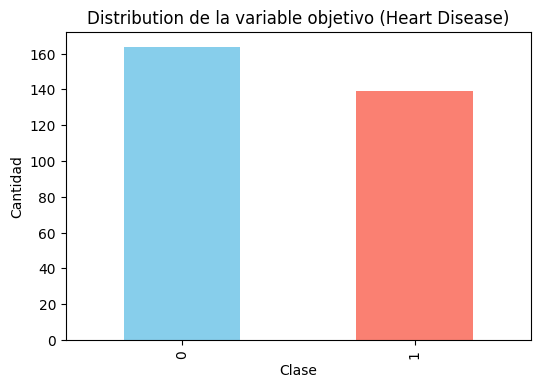

In [3]:
import matplotlib.pyplot as plt

target_column = 'target'
print("\nDistribution de la variable objetivo:")
print(df[target_column].value_counts())

plt.figure(figsize=(6, 4))
df[target_column].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution de la variable objetivo (Heart Disease)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

2.b) División del dataset en conjunto de entrenamiento y prueba

In [4]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprimir la distribución de la variable objetivo en el conjunto de entrenamiento
print("\nDistribución en conjunto de entrenamiento:")
print(y_train.value_counts())

# Imprimir la distribución de la variable objetivo en el conjunto de prueba
print("\nDistribución en conjunto de prueba:")
print(y_test.value_counts())


Distribución en conjunto de entrenamiento:
target
0    131
1    111
Name: count, dtype: int64

Distribución en conjunto de prueba:
target
0    33
1    28
Name: count, dtype: int64


3) Implementación de la MLP con Dropout:

- Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.

- Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.

- Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

3.a) Importación de librerías necesarias

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

3.b) Definición del modelo MLP

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3.c) Definición del callback para Early Stopping

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

3.d) Entrenamiento del modelo

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4974 - loss: 6.7645 - val_accuracy: 0.6885 - val_loss: 0.8504
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5976 - loss: 4.9746 - val_accuracy: 0.6230 - val_loss: 1.0972
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5091 - loss: 5.1458 - val_accuracy: 0.6721 - val_loss: 0.7280
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5011 - loss: 5.8862 - val_accuracy: 0.7213 - val_loss: 0.6805
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5650 - loss: 3.9725 - val_accuracy: 0.6066 - val_loss: 1.3613
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4866 - loss: 4.0711 - val_accuracy: 0.6230 - val_loss: 1.0824
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5669 - loss: 3.1056 - val_accuracy: 0.7213 - val_loss: 0.6735
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5240 - loss: 2.7781 - val_accuracy: 0.6721 - val_loss: 0.6266


3.e) Evaluación del modelo

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7210 - loss: 0.5417
Pérdida en el conjunto de prueba: 0.5271
Precisión en el conjunto de prueba: 73.77%


4) Entrenamiento del modelo:

- Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.

- Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

4.a) Entrenamiento del modelo

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5448 - loss: 2.2701 - val_accuracy: 0.6721 - val_loss: 0.7054
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5356 - loss: 1.9746 - val_accuracy: 0.6721 - val_loss: 0.7466
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5468 - loss: 1.9792 - val_accuracy: 0.6393 - val_loss: 0.5826
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5275 - loss: 1.8451 - val_accuracy: 0.6721 - val_loss: 0.6983
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5710 - loss: 1.4001 - val_accuracy: 0.6557 - val_loss: 0.6426
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5311 - loss: 1.2847 - val_accuracy: 0.6557 - val_loss: 0.6007
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5347 - loss: 1.3158 - val_accuracy: 0.6230 - val_loss: 0.5888
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5968 - loss: 0.9529 - val_accuracy: 0.6393 - val_loss:

4.b) Visualización de curvas de aprendizaje

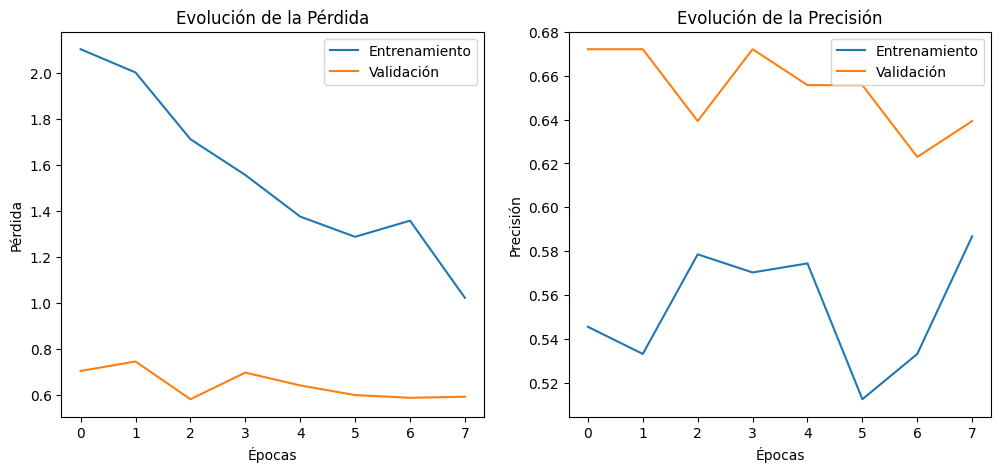

In [17]:
import matplotlib.pyplot as plt

# Extraer los valores de pérdida y precisión del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear una figura para visualizar las curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de la evolución de la pérdida
plt.subplot(1, 2, 1)
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la evolución de la precisión
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Entrenamiento')
plt.plot(val_accuracy, label='Validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

5) Evaluación del modelo:

- Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión
- Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas

5.a) Evaluación en el conjunto de prueba

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener las predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Sin enfermedad', 'Con enfermedad']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Informe de Clasificación:
                precision    recall  f1-score   support

Sin enfermedad       0.62      0.88      0.72        33
Con enfermedad       0.71      0.36      0.48        28

      accuracy                           0.64        61
     macro avg       0.67      0.62      0.60        61
  weighted avg       0.66      0.64      0.61        61



5.b) Visualización de la matriz de confusión

Matriz de Confusión:
[[29  4]
 [18 10]]


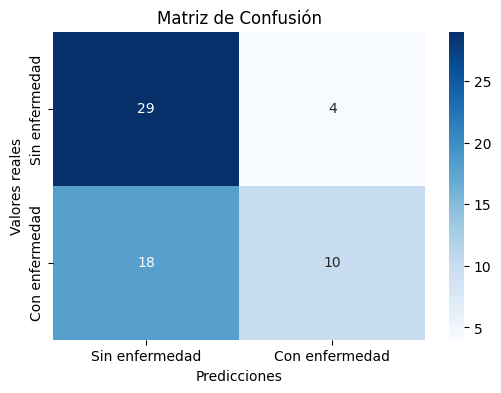

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Sin enfermedad', 'Con enfermedad'],
            yticklabels=['Sin enfermedad', 'Con enfermedad'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

5.c) Discusión sobre Dropout y Early Stopping

Impacto Observado:

- Dropout: Introduce ruido aleatorio en las neuronas durante el entrenamiento, mejorando la capacidad de generalización del modelo y reduciendo el riesgo de sobreajuste.

- Early Stopping: Evita entrenamientos innecesarios, lo cual ayuda a encontrar un equilibrio entre pérdida y precisión sin sobreentrenar el modelo.